<a href="https://colab.research.google.com/github/Siva-keerthy/OIBSIP_Datascience_Task3/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Infobyte_internship/car_data.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())
print(df.describe(include="all"))

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [6]:
print(df.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


**Data cleaning**

In [8]:
df["Car_Age"] = 2025 - df["Year"]
df.drop(["Car_Name", "Year"], axis=1, inplace=True)
df.rename(columns={
    "Selling_Price": "Price",
    "Driven_kms": "Kilometers_Driven",
    "Selling_type": "Seller_Type"
}, inplace=True)

print(df.head())


   Price  Present_Price  Kilometers_Driven Fuel_Type Seller_Type Transmission  \
0   3.35           5.59              27000    Petrol      Dealer       Manual   
1   4.75           9.54              43000    Diesel      Dealer       Manual   
2   7.25           9.85               6900    Petrol      Dealer       Manual   
3   2.85           4.15               5200    Petrol      Dealer       Manual   
4   4.60           6.87              42450    Diesel      Dealer       Manual   

   Owner  Car_Age  
0      0       11  
1      0       12  
2      0        8  
3      0       14  
4      0       11  


**Data preprocessing**

In [9]:
X = df.drop("Price", axis=1)
y = df["Price"]
categorical_cols = ["Fuel_Type", "Seller_Type", "Transmission", "Owner"]
numerical_cols = ["Present_Price", "Kilometers_Driven", "Car_Age"]
preprocessor = ColumnTransformer([
    ("onehot", OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')


**Training the model- Random Forest**

In [10]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create pipeline with RandomForest
model = Pipeline([
    ("preprocessing", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Fuel_Type', 'Seller_Type',
                                                   'Transmission',
                                                   'Owner'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

**Prediction**

In [11]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.6347786885245904
RMSE: 0.9475979071349606
R2 Score: 0.9610193614659255


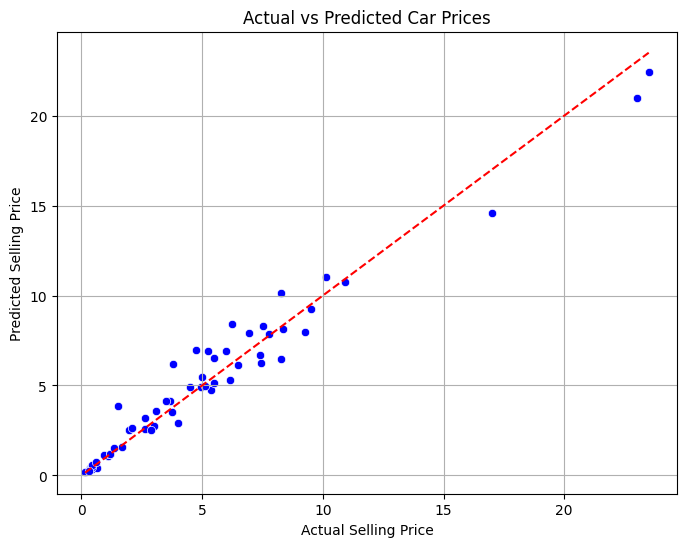

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.grid(True)
plt.show()
